

# Project: Investigate a Dataset - [TMDb Movie Database]
by Clifford Aniakor

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information of about 10,000 movies collected from The Movie Database (TMDb), including production companies and revenue. To answer our research questions, the database will be narrowed down to 9616 movies.<br>
- id: The Movie Database ID <br>
- imdbid: International Movie Database ID<br>
- popularity: Movies popularity score<br>
- original_ile: Movie Title <br>
- cast: Cast Names <br>
- director: Movie director's name <br>
- runtime: Movie length<br> 
- genres: Movie genre <br>
- production_companies: Movie production companies <br>
- Release_data: Movie date of release<br>
- vote_count: Movie number of vote<br>
- vote_average: Mean movie votes<br>
- release_year: Movie release year<br>
- budget_adj:  Adjusted movie budget<br>
- revenue_adj: Adjusted movie revenue earnings<br>
- net_profit:  net profit<br>

### Questions for Analysis
- What is the percentage share of successful films to fims that flopped at the box office?<br>
- What are the top 10 highest grossing films? And show with the aid of a chart, the directors?<br>
- What are the most successful years in the given history of filmmaking?<br>
- Which genre was the most produced?<br>
- What is the strength of the relationship between the measurable film attributes?<br>
- Using a function and plot compare the relationship between popularity and vote average on vote count?<br>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [7]:
# Let's Load the  data and print out a few lines for narrow inspection.
df=pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
#the dimension of our dataset
df.shape

(10866, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
df['budget_adj'] = df['budget_adj'].replace(np.nan,0)

The adjusted budget column with entries equal to 0 were replaced with nan to reduce inconsitencies in estimations

In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
#Select movies with run time greater than or equal to 40. 
df2=df.query('runtime>=40').copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10616 entries, 0 to 10865
Data columns (total 21 columns):
id                      10616 non-null int64
imdb_id                 10609 non-null object
popularity              10616 non-null float64
budget                  10616 non-null int64
revenue                 10616 non-null int64
original_title          10616 non-null object
cast                    10567 non-null object
homepage                2861 non-null object
director                10581 non-null object
tagline                 7972 non-null object
keywords                9211 non-null object
overview                10615 non-null object
runtime                 10616 non-null int64
genres                  10599 non-null object
production_companies    9659 non-null object
release_date            10616 non-null object
vote_count              10616 non-null int64
vote_average            10616 non-null float64
release_year            10616 non-null int64
budget_adj              1

The Academy of Motion Picture Arts and Science (The Oscars) recognizes only movies with a runtime of 40 minutes and above as feature films. We extracted the movies that fufilled this requirement and stored them in a new variable 'df2'.

In [14]:
#drop extraneous columns
df2.drop(columns=['homepage','tagline','keywords','overview','budget','revenue'],inplace=True)
df2.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I assumed that data attributes such as homepage, tagline, keywords and overview were extraneous for the analysis. Hence, these attributes were excluded. Furthermore, budget and revenue were also excluded since the dataset contains the adjusted values of each (adjusted budget and adjusted revenue).

Let's investigate the total number of missing values per column

In [15]:
#look out for the sum of null values
df2.isnull().sum()

id                        0
imdb_id                   7
popularity                0
original_title            0
cast                     49
director                 35
runtime                   0
genres                   17
production_companies    957
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

In [16]:
#drop null values
df2.dropna(axis=0,inplace=True)
df2.shape

(9617, 15)

In [17]:
df2.duplicated().sum()

1

In [18]:
# drop the duplicate
df2.drop_duplicates(inplace=True)
df2.head(3)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Missing values and duplicates were eliminated to ensure consistency.

In [19]:
#Lets have look at the summary statistics for the numerical variables
df2.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9.616000e+03,9.616000e+03
mean,62365.555532,0.699159,104.384983,242.127184,5.951643,2000.789517,1.972218e+07,5.797388e+07
std,90100.223718,1.043691,25.592199,607.374789,0.909117,13.047758,3.586690e+07,1.524988e+08
min,5.000000,0.000188,40.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10182.000000,0.233915,91.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18373.500000,0.420687,100.000000,46.000000,6.000000,2005.000000,6.766735e+05,0.000000e+00
75%,67979.500000,0.779695,112.000000,176.000000,6.600000,2011.000000,2.531967e+07,4.437978e+07
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What the percentage share of successful films and films that flopped at the boxoffice?)

To answer this question, we need to create a new column containing the net profit. The net profit is the difference between the adjusted gross revenue and the adjusted budget.

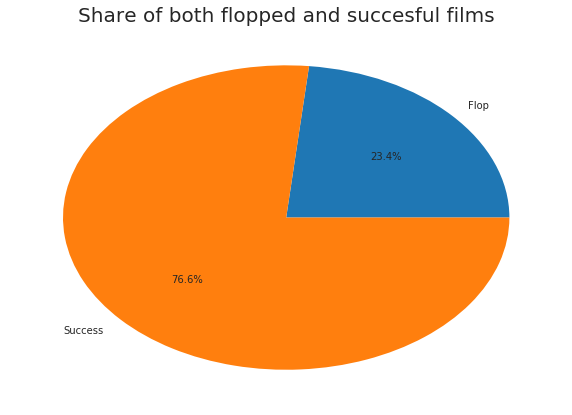

In [20]:
#create new column containing the net profit
df2['net_profit']=df2['revenue_adj']-df2['budget_adj']
#Get the number of films
Net_profit=df2['net_profit'].shape[0]
#Obtain the number of flopped films
Flop=df2.query("net_profit<0").shape[0]
#Obtain the number of successful films
Success=df2.query("net_profit>=0").shape[0]
#Create list and labels
data=[Flop,Success]
Labels=['Flop', 'Success']

#set plot size
fig=plt.figure(figsize=(10,7))
#pie plot
plt.pie(data,labels=Labels,autopct='%1.1f%%')
#add and format title
plt.title("Share of both flopped and succesful films", fontsize=20);

From the Pie Chart, we can say that 23.4% of the movies flopped at the box off ice while 76.6% of the movies were successful.

### Research Question 2  (What are the top10 highest grossing films? And show with the aid of visualization their directors )

To answer this question, we need to create a new column containing the net profit. The net profit is the difference between the adjusted gross revenue and the adjusted budget.

In [21]:
#Obtain the movie titles and directors with corresponding revenue
df4=df2.groupby(['original_title','director']).revenue_adj.sum()
#Obtain the top ten
TopTenMovies=df4.nlargest(10)
TopTenMovies

original_title                  director                                         
Avatar                          James Cameron                                        2.827124e+09
Star Wars                       George Lucas                                         2.789712e+09
Titanic                         James Cameron                                        2.506406e+09
The Exorcist                    William Friedkin                                     2.167325e+09
Jaws                            Steven Spielberg                                     1.907006e+09
Star Wars: The Force Awakens    J.J. Abrams                                          1.902723e+09
E.T. the Extra-Terrestrial      Steven Spielberg                                     1.791694e+09
The Net                         Irwin Winkler                                        1.583050e+09
One Hundred and One Dalmatians  Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman    1.574815e+09
The Avengers                    Joss

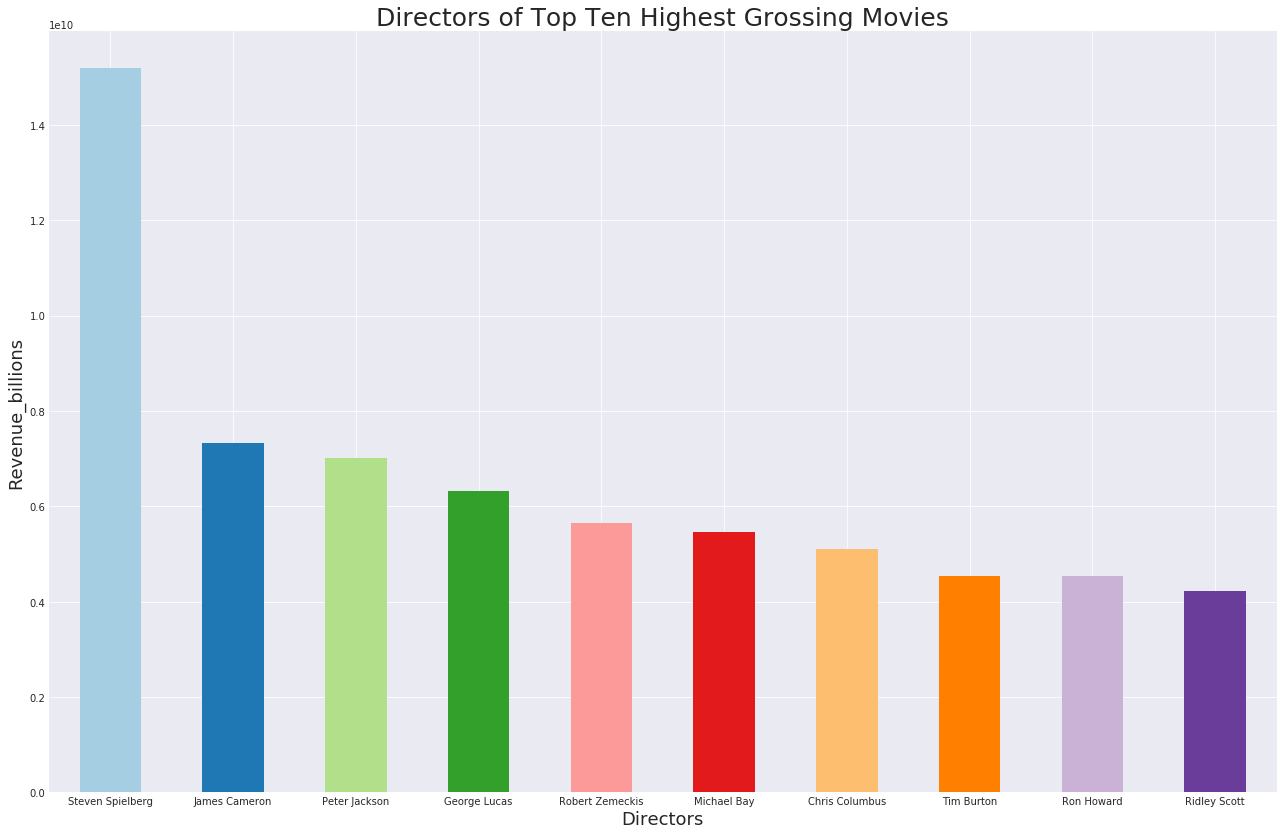

In [22]:
#Get top 10 directors of highest grossing films
TopTen=df2.groupby(['director']).revenue_adj.sum().nlargest(10)
#set plot size
fig=plt.figure(figsize=(22,14))
#bar plot
TopTen.plot(kind='bar', x='director',rot=0,color=plt.cm.Paired(np.arange(len(TopTen))))
#add and format y label
plt.ylabel("Revenue_billions", fontsize=18)
#add and format x label
plt.xlabel("Directors",fontsize=18)
#add title for plot
plt.title("Directors of Top Ten Highest Grossing Movies", fontsize=25);

Amongst the directors of the top ten highest grossing films, James Cameron's Avatar is the highest grossing film. However, Steven Spielberg had 2 movie entries within the top ten hence, making him the the top director.

### Research Question 3 (What are the most successful years in the history of filmmaking?)


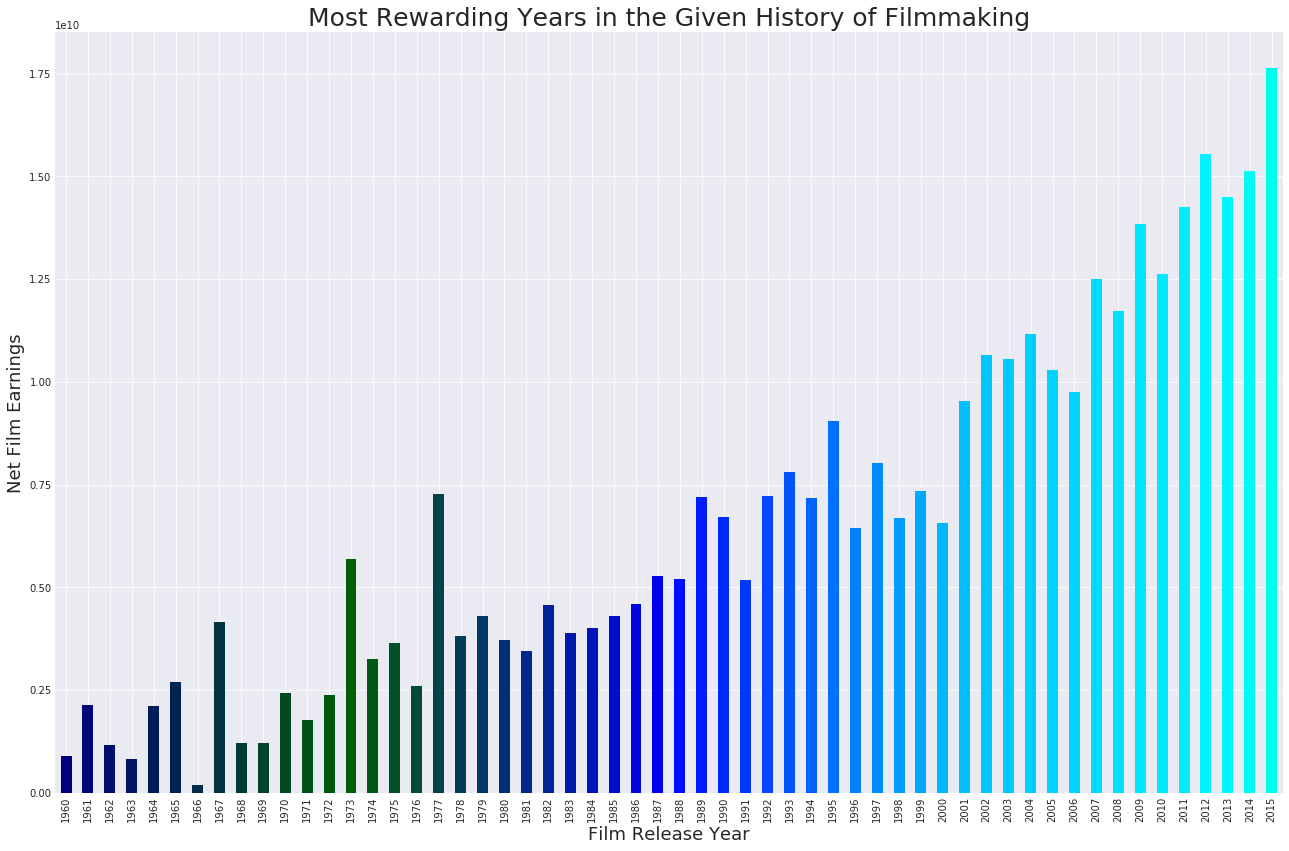

In [24]:
#Extract using groupby the release years and total profit
Years=df2.groupby('release_year').net_profit.sum()
#set plot size
fig=plt.figure(figsize=(22,14))
#bar plot and set colours
Years.plot(kind='bar', x='release_year',color=plt.cm.gist_ncar(np.arange(len(Years))))
#add and format y label
plt.ylabel("Net Film Earnings", fontsize=18)
#add and format x label
plt.xlabel("Film Release Year",fontsize=18)
#add and format title 
plt.title("Most Rewarding Years in the Given History of Filmmaking", fontsize=25);

2015 was the most succesful year in the filmmaking timeline. 1966 is the least successful year.

### Research Question 4 (Show with the aid of visualization, which movie genre was the most produced?)

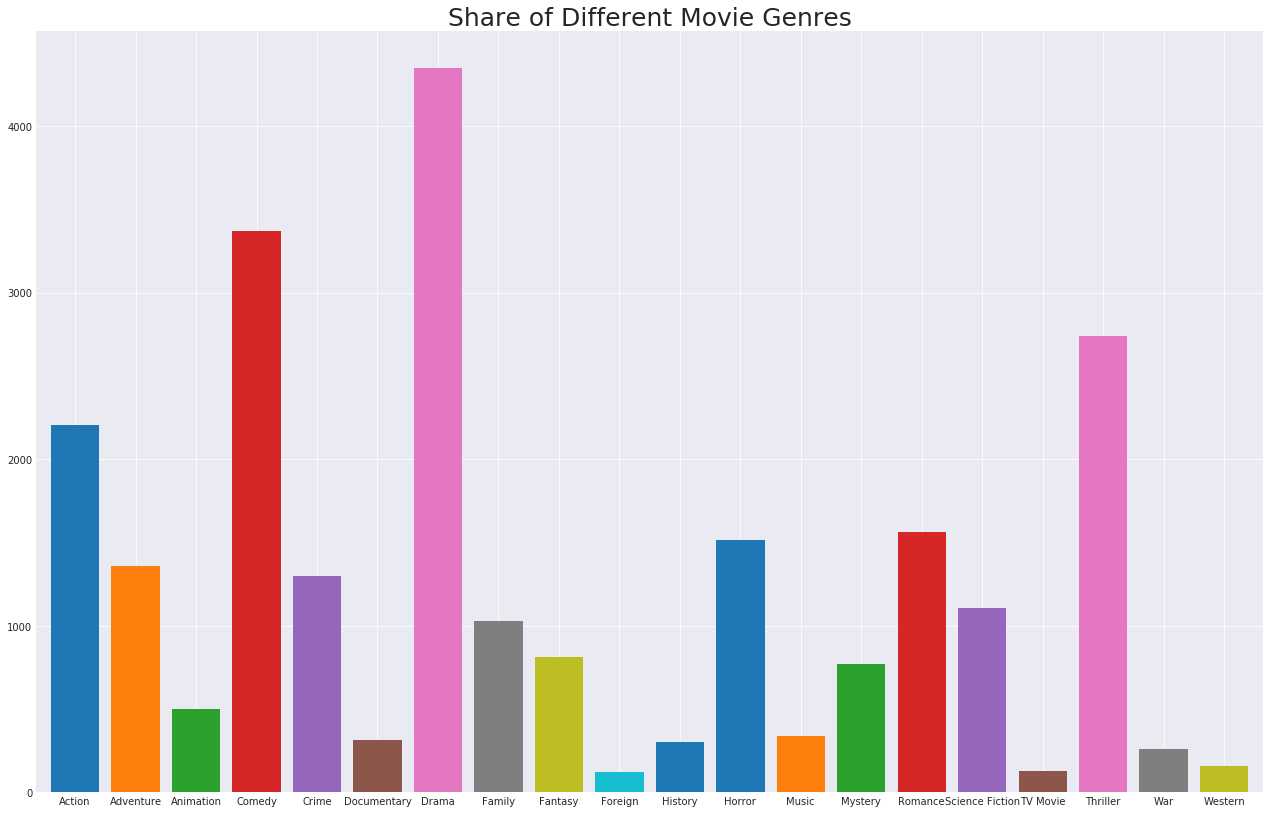

In [25]:
#Seperate composite genres joined by |
df6=df2['genres'].str.get_dummies(sep='|')
df7=df6[df6.columns].apply(lambda x:sum(x.values))

#set plot size
fig=plt.figure(figsize=(22,14))
#plot bar chart
df7.plot.bar(rot=0, width=0.8)
#add title and format
plt.title("Share of Different Movie Genres", fontsize=25);

Drama is the most inherent film genre. While TV movie and foreign movies are the least produced genre. 

### Research Question 5 (What is the strength of the relationship between different film-related attributes?)

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
id,1.000000,0.005367,-0.074021,-0.024942,-0.097973,0.508575,-0.185304,-0.135943,-0.106344
popularity,0.005367,1.000000,0.156314,0.803246,0.245314,0.114012,0.505094,0.606481,0.561521
runtime,-0.074021,0.156314,1.000000,0.185970,0.261713,-0.122099,0.243639,0.196438,0.160201
vote_count,-0.024942,0.803246,0.185970,1.000000,0.286497,0.127660,0.579854,0.703687,0.653199
vote_average,-0.097973,0.245314,0.261713,0.286497,1.000000,-0.147099,0.118648,0.222539,0.224101
release_year,0.508575,0.114012,-0.122099,0.127660,-0.147099,1.000000,0.040144,-0.054143,-0.073212
budget_adj,-0.185304,0.505094,0.243639,0.579854,0.118648,0.040144,1.000000,0.639919,0.466000
revenue_adj,-0.135943,0.606481,0.196438,0.703687,0.222539,-0.054143,0.639919,1.000000,0.978108
net_profit,-0.106344,0.561521,0.160201,0.653199,0.224101,-0.073212,0.466000,0.978108,1.000000


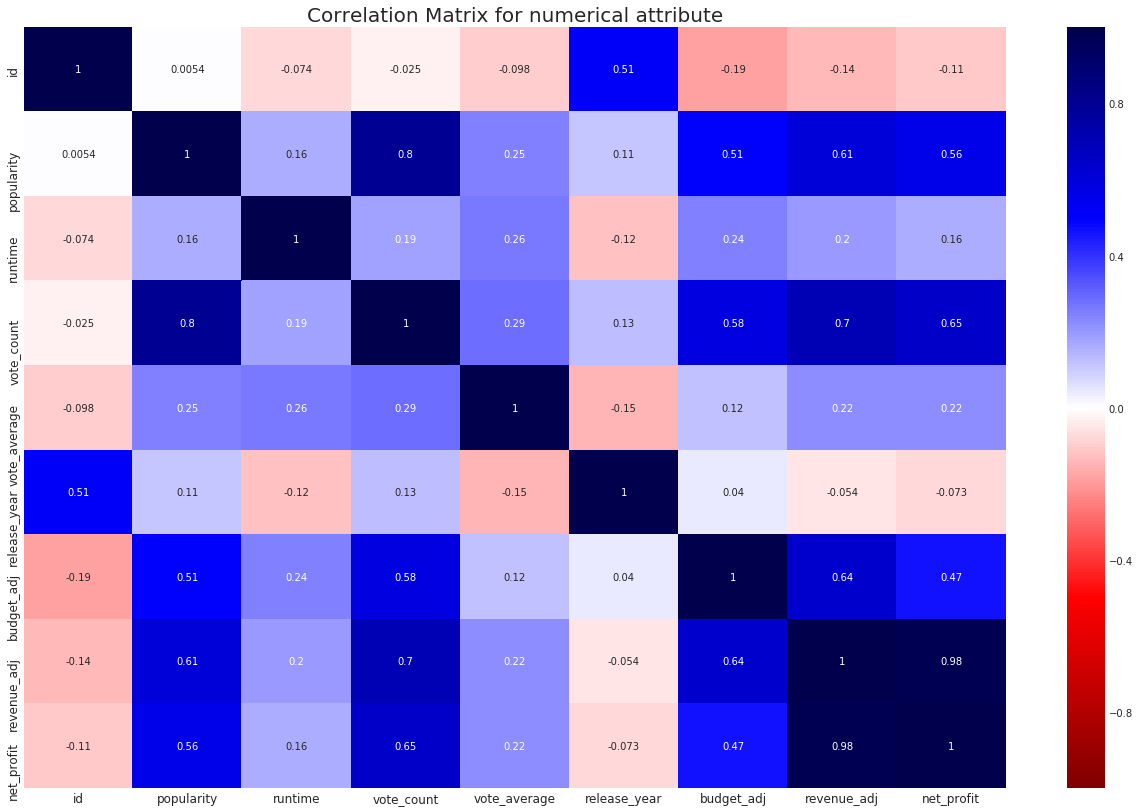

In [63]:
#Create correlation matrix
Relationship=df2.corr()
#set plot size
plt.figure(figsize=(22,14))
#Create heatmap containing correlation matrix
sns.heatmap(Relationship, cmap='seismic_r',annot=True,vmin=-1, vmax=1, center=0)
plt.title("Correlation Matrix for numerical attribute", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
Relationship

In correlation analysis. A strong positive relationship is closer to or equal to 1. A strong negative relationship is closer to or equal to -1. A weak or no relationship approaches 0. There is a strong positive relationship between popularity and vote counts. Vote counts also has a fairly strong relationship with adjusted revenue earnings. Net profit is strongly positively correlated to adjusted revenue earnings.

### Research Question 6 (Use a function and plot to compare the relationship between popularity and vote average on vote count?)

In [48]:
def AutoReg (df, xVar, yVar):
#plot
  plt.figure(figsize=(22,14))
  sns.regplot(x=xVar, y=yVar, data=df)
#add a space to replace underscores
  xVar=xVar.replace("_"," ")
  yVar=yVar.replace("_"," ")
#add and format title
  plt.title(f'Plot of {yVar} against {xVar}'.title(), fontsize=20)
#add x label and format    
  plt.xlabel(xVar.title(),fontsize=18, weight='bold')
#add y label and format    
  plt.ylabel(yVar.title(), fontsize=18)

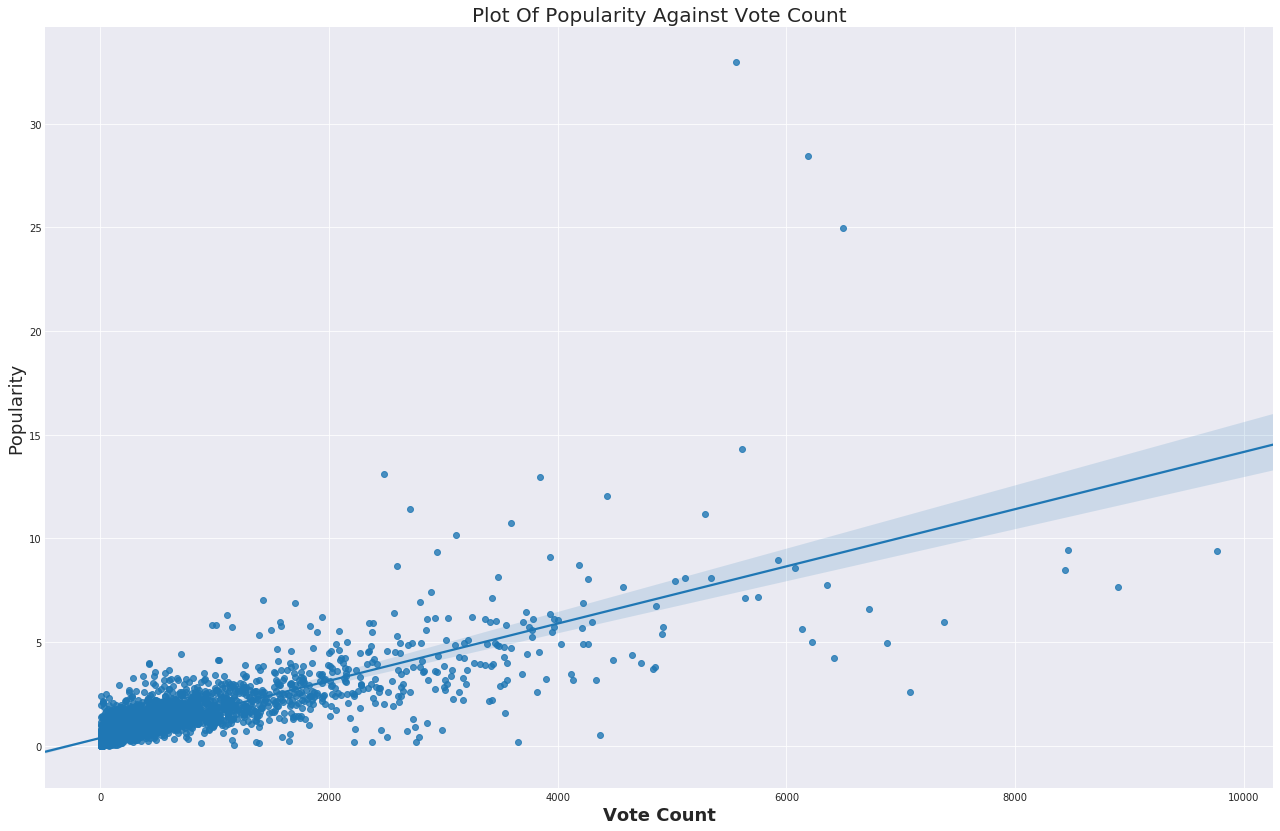

In [49]:
AutoReg(df2,'vote_count','popularity')

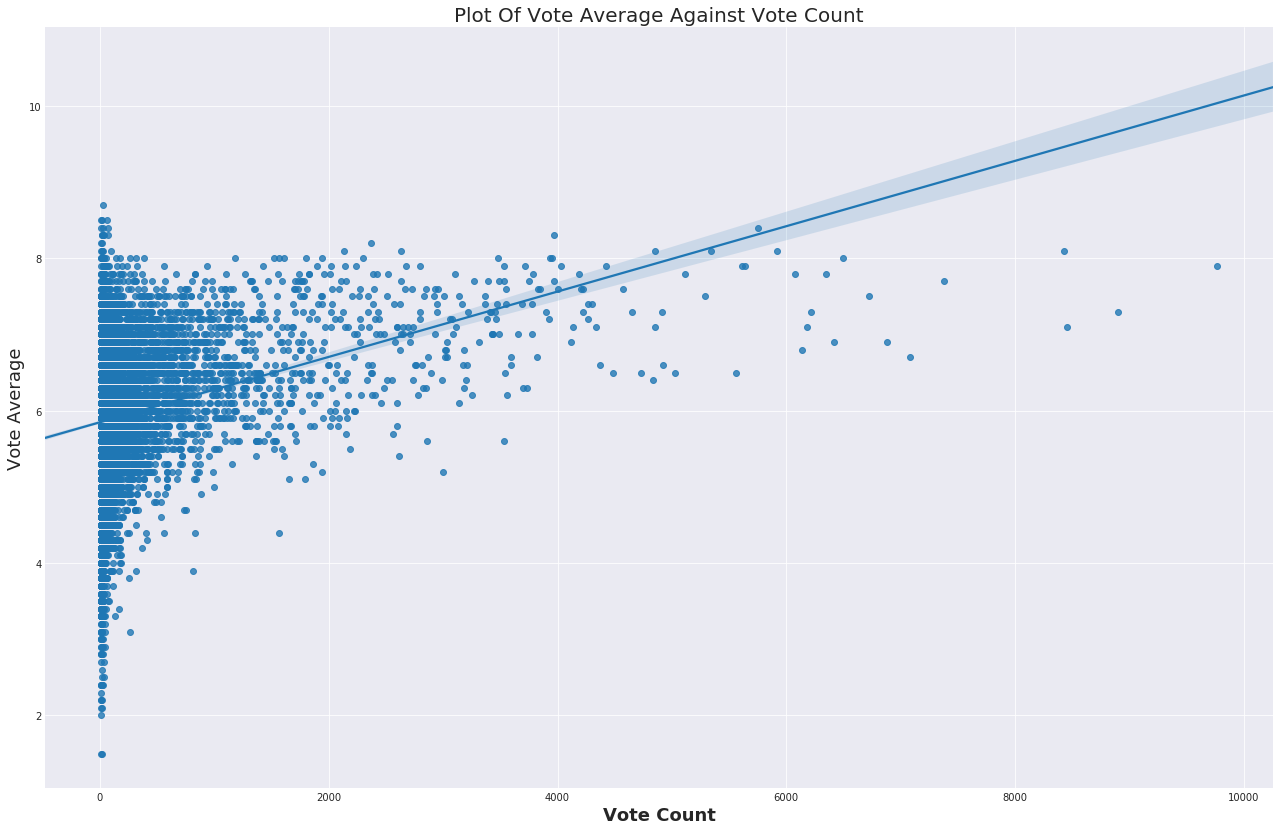

In [50]:
AutoReg(df2,'vote_count','vote_average')

Comparing the two regression plots, we can say that popularity has a stronger dependence on vote counts compared to vote average.

<a id='conclusions'></a>
## Conclusions

>In conclusion, Avatar is the highest grossing film from the data set but it wasn't enough to award 2009 the most successful year in the database timeline. 2015 was the most succesful year in filmmaking. 23.4% of movies produced were unsuccessful at the box office. 18% of movies produced contain a drama genre. The data revealed a strong correlation between popularity and vote counts. 

### Limitations
> 957 movies with a runtime above 40 minutes had to excluded because the production companies data were missing. Other movies with missing data on IMDB ID, Cast, director and genres were also dropped. This was done to ensure consistency and uniformity within the database.



In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0